In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Generate product data
def generate_product_data(n_products=100):
    categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Beauty'] # Indented this line by 4 spaces
    products = pd.DataFrame({
        'product_id': range(1, n_products + 1),
        'category': np.random.choice(categories, size=n_products),
        'price': np.random.uniform(10, 1000, size=n_products).round(2),
        'stock_level': np.random.randint(0, 200, size=n_products)
    })
    return products

# Generate sales data for 6 months
def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    sales_list = []
    for date in dates:
    # Generate more sales for weekends
        n_sales = np.random.randint(
            50, 100 if date.weekday() >= 5 else 80
        )
        daily_sales = pd.DataFrame({
            'date': [date] * n_sales,
            'product_id': np.random.choice(products['product_id'], size=n_sales),
            'quantity': np.random.randint(1, 5, size=n_sales),
            'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3])
        })
        sales_list.append(daily_sales)
    sales_df = pd.concat(sales_list, ignore_index=True)
    # Add returned items
    sales_df['returned'] = np.random.choice(
        [0, 1],
        size=len(sales_df),
        p=[0.95, 0.05] # 5% return rate
    )
    return sales_df

# Generate the datasets
products_df = generate_product_data()
sales_df = generate_sales_data(products_df)

# **1. Basic Data Analysis**

In [30]:
# # Information about the number of rows and columns in products_df
products_df.shape

(100, 4)

In [29]:
# Information about the number of rows and columns sales_df
sales_df.shape

(12266, 5)

In [31]:
# First 5 rows in products_df
products_df.head()

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,37,3,0,0
1,2023-07-01,24,3,0,0
2,2023-07-01,93,3,0,0
3,2023-07-01,46,4,0,0
4,2023-07-01,53,4,1,0


In [32]:
# First 5 rows in sales_df
sales_df.head()

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,37,3,0,0
1,2023-07-01,24,3,0,0
2,2023-07-01,93,3,0,0
3,2023-07-01,46,4,0,0
4,2023-07-01,53,4,1,0


In [33]:
# Information about products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   100 non-null    int64  
 1   category     100 non-null    object 
 2   price        100 non-null    float64
 3   stock_level  100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [34]:
# Information about sales_df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12266 entries, 0 to 12265
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              12266 non-null  datetime64[ns]
 1   product_id        12266 non-null  int64         
 2   quantity          12266 non-null  int64         
 3   discount_applied  12266 non-null  int64         
 4   returned          12266 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 479.3 KB


In [38]:
# Number of missing values in product_df
products_df.isnull().sum()

,0
product_id,0
category,0
price,0
stock_level,0


In [39]:
# Number of missing values in sales_df
sales_df.isnull().sum()

,0
date,0
product_id,0
quantity,0
discount_applied,0
returned,0


No null values present in product_df or sales_df.

In [43]:
# To check for duplicate values in product_df
products_df.duplicated().sum()

0

In [44]:
# To check for duplicate values in sales_df
sales_df.duplicated().sum()

527

There are 527 duplicate values in sales_df which need to be handled.

In [47]:
# Drop duplicate datas from sales_df
sales_df.drop_duplicates(inplace=True)
sales_df.duplicated().sum()

0

In [48]:
# summary statistics for numerical columns in product_df
products_df.describe()

,product_id,price,stock_level
count,100.000000,100.000000,100.000000
mean,50.500000,491.102100,104.660000
std,29.011492,268.604688,58.928174
min,1.000000,10.520000,1.000000
25%,25.750000,262.977500,47.000000
50%,50.500000,468.785000,112.000000
75%,75.250000,698.632500,151.250000
max,100.000000,997.760000,199.000000


In [49]:
# summary statistics for numerical columns in sales_df
sales_df.describe()

,date,product_id,quantity,discount_applied,returned
count,11739,11739.000000,11739.000000,11739.000000,11739.000000
mean,2023-09-30 19:14:18.369537280,50.278048,2.488713,0.307863,0.051538
min,2023-07-01 00:00:00,1.000000,1.000000,0.000000,0.000000
25%,2023-08-15 12:00:00,25.000000,1.000000,0.000000,0.000000
50%,2023-10-01 00:00:00,50.000000,2.000000,0.000000,0.000000
75%,2023-11-16 00:00:00,75.000000,3.000000,1.000000,0.000000
max,2023-12-31 00:00:00,100.000000,4.000000,1.000000,1.000000
std,NaN,28.928789,1.115851,0.461629,0.221101


In [50]:
# Aggregation results of price in product_df
products_df.agg({'price': ['min', 'max', 'mean', 'median']})

,price
min,10.5200
max,997.7600
mean,491.1021
median,468.7850


In [51]:
# Aggregation results of quantity in sales_df
sales_df.agg({'quantity': ['min', 'max', 'mean', 'median']})

,quantity
min,1.000000
max,4.000000
mean,2.488713
median,2.000000


Dataframes after analysis :

In [52]:
products_df

,product_id,category,price,stock_level
0,1,Home,915.81,10
1,2,Beauty,851.54,184
2,3,Books,454.96,177
3,4,Beauty,104.46,150
4,5,Beauty,377.11,158
...,...,...,...,...
95,96,Books,105.21,157
96,97,Beauty,941.12,45
97,98,Clothing,403.60,116
98,99,Clothing,522.57,5


In [53]:
sales_df

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,37,3,0,0
1,2023-07-01,24,3,0,0
2,2023-07-01,93,3,0,0
3,2023-07-01,46,4,0,0
4,2023-07-01,53,4,1,0
...,...,...,...,...,...
12261,2023-12-31,30,1,0,0
12262,2023-12-31,52,1,0,0
12263,2023-12-31,79,3,0,0
12264,2023-12-31,20,2,1,0


# **2. Sales Analysis**

In [56]:
# Merge product price into sales_df
sales_df = sales_df.merge(products_df[['product_id', 'price']], on='product_id', how='left')

In [58]:
# Calculate total revenue per product
sales_df['total_revenue'] = (
    sales_df['quantity'] * sales_df['price'] *
    (1 - sales_df['discount_applied'])
)

In [63]:
sales_df['total_revenue']

,total_revenue
0,1385.91
1,1702.92
2,2142.12
3,2604.84
4,0.00
...,...
11734,943.43
11735,489.98
11736,1127.88
11737,0.00


In [64]:
# Top 10 best-selling products by Revenue
sales_df.groupby('product_id')['total_revenue'].sum().sort_values(ascending=False).head(10)

,total_revenue
product_id,
30,215102.04
12,212865.81
97,204223.04
83,198685.18
68,197323.70
66,184585.60
13,184541.14
33,182503.62
1,180414.57


In [65]:
# Top 10 best-selling products by Quantity sold
sales_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

,quantity
product_id,
67,352
87,343
15,343
19,340
3,337
58,336
96,335
13,331
9,329


In [67]:
# Top 10 best-selling products by Return rate
sales_df.groupby('product_id')['returned'].mean().sort_values(ascending=False).head(10)

,returned
product_id,
21,0.105691
98,0.090164
92,0.088000
90,0.084746
64,0.084615
65,0.083333
68,0.081818
71,0.078947
25,0.078125


In [69]:
# Daily sales trends
sales_df.groupby('date')['quantity'].sum()

,quantity
date,
2023-07-01,210
2023-07-02,188
2023-07-03,124
2023-07-04,130
2023-07-05,122
...,...
2023-12-27,141
2023-12-28,155
2023-12-29,185


In [71]:
# Monthly trends
sales_df['month'] = sales_df['date'].dt.month
sales_df.groupby('month')['quantity'].sum()

,quantity
month,
7,4900
8,4830
9,4802
10,4881
11,4771
12,5031


# **3. Category Performance**

In [74]:
sales_df.head()

,date,product_id,quantity,discount_applied,returned,price,total_revenue,day_of_week,month
0,2023-07-01,37,3,0,0,461.97,1385.91,Saturday,7
1,2023-07-01,24,3,0,0,567.64,1702.92,Saturday,7
2,2023-07-01,93,3,0,0,714.04,2142.12,Saturday,7
3,2023-07-01,46,4,0,0,651.21,2604.84,Saturday,7
4,2023-07-01,53,4,1,0,695.51,0.00,Saturday,7


In [79]:
# merge category of product_df to sales_df
sales_df = sales_df.merge(products_df[['product_id', 'category']], on='product_id', how='left')

In [80]:
# Total revenue analysis
sales_df.groupby('category')['total_revenue'].sum().so


,total_revenue
category,
Beauty,2184666.94
Books,1665968.87
Clothing,2029250.41
Electronics,1639592.02
Home,2341750.16


In [88]:
# Average order size
sales_df.groupby('category')['quantity'].mean().sort_values(ascending=False)

,quantity
category,
Clothing,2.521166
Books,2.488666
Home,2.488048
Beauty,2.484382
Electronics,2.455834


In [87]:
# Return rates
sales_df.groupby('category')['returned'].mean().sort_values(ascending=False)

,returned
category,
Clothing,0.057109
Books,0.052188
Beauty,0.051607
Electronics,0.049126
Home,0.048141


In [86]:
# Discount impact
sales_df.groupby('category')['discount_applied'].mean().sort_values(ascending=False)

,discount_applied
category,
Home,0.317065
Electronics,0.309872
Books,0.305746
Clothing,0.305112
Beauty,0.298325


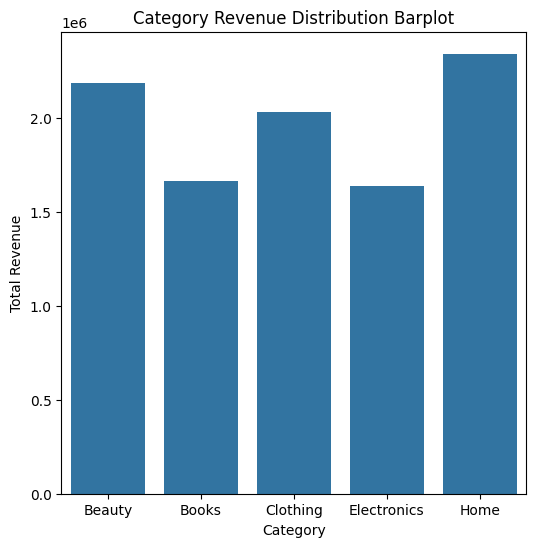

In [98]:
#category revenue distribution graph
plt.figure(figsize=(6, 6))
sns.barplot(x=sales_df.groupby('category')['total_revenue'].sum().index, y=sales_df.groupby('category')['total_revenue'].sum().values)
plt.title('Category Revenue Distribution Barplot')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

<Axes: xlabel='date', ylabel='quantity'>

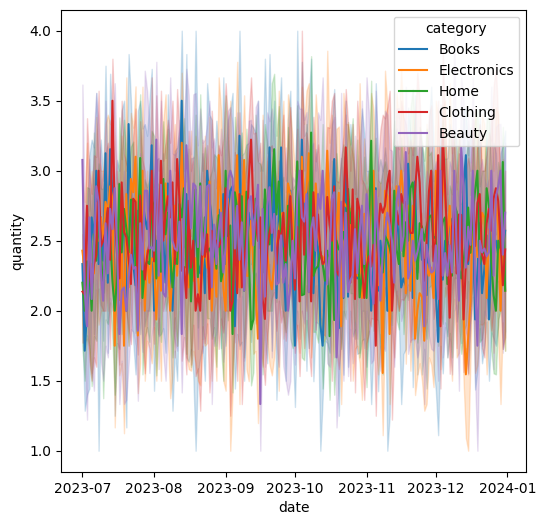

In [104]:

# Category sales trends over time graph
plt.figure(figsize=(6, 6))
sns.lineplot(x='date', y='quantity', hue='category', data=sales_df)


<Axes: xlabel='date', ylabel='total_revenue'>

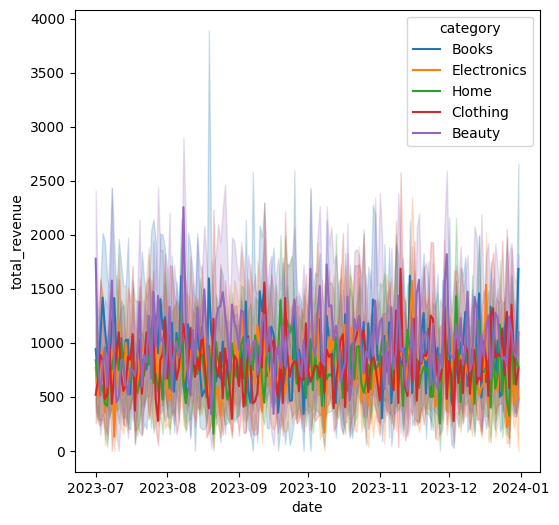

In [111]:
#  Category sales trends over time visualization
plt.figure(figsize=(6, 6))
sns.lineplot(x='date', y='total_revenue', hue='category', data=sales_df)

In [119]:
sales_df['date'].dt.month.unique()

array([ 7,  8,  9, 10, 11, 12], dtype=int32)

<ipython-input-114-33de1fc349b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='returned', data=sales_df, palette='Set2')


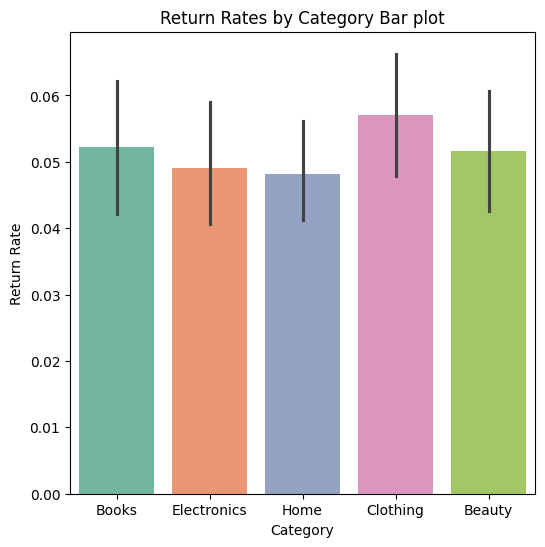

In [114]:
# Return rates by category visualization
plt.figure(figsize=(6, 6))
sns.barplot(x='category', y='returned', data=sales_df, palette='Set2')
plt.title('Return Rates by Category Bar plot')
plt.xlabel('Category')
plt.ylabel('Return Rate')
plt.show()

In [116]:
sales_df.columns

Index(['date', 'product_id', 'quantity', 'discount_applied', 'returned',
       'price', 'total_revenue', 'day_of_week', 'month', 'category'],
      dtype='object')

In [117]:
products_df.columns

Index(['product_id', 'category', 'price', 'stock_level'], dtype='object')

Insights:
Home categories drive the most revenue.
There is a positive correlation between price and return rate
Discounts significantly impact sales volume

